# Importing Libraries

In [612]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data

In [613]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [614]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [615]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [616]:
df.shape

(7043, 21)

In [617]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Setting Display options to ensure feature name visibility

In [618]:
pd.set_option('display.max_columns',None)

# Warning Suppression 

In [619]:
import warnings
warnings.filterwarnings('ignore')

# Missing Values

In [620]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Drop ID Feature from the dataset

In [621]:
df=df.drop(['customerID'],axis=1)

# Label the Churn feature to 1 or 0

In [622]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [623]:
df['target']=np.where(df['Churn']=="Yes",1,0)

Text(0.5, 1.0, 'Class Distributions \n (0: No Churn || 1: Churn)')

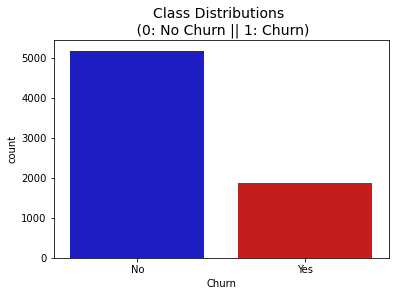

In [624]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Churn', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Churn || 1: Churn)', fontsize=14)

In [625]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.target==0]
df_minority = df[df.target==1]

print(df_majority.Churn.count())
print("-----------")
print(df_minority.Churn.count())
print("-----------")
print(df.Churn.value_counts())

5174
-----------
1869
-----------
No     5174
Yes    1869
Name: Churn, dtype: int64


In [626]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=5174,    # to match majority class
                                 random_state=587) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.Churn.value_counts()

Yes    5174
No     5174
Name: Churn, dtype: int64

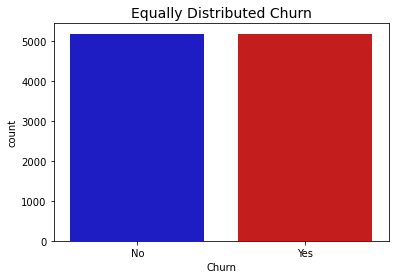

In [627]:
sns.countplot('Churn', data=df_upsampled, palette=colors)
plt.title('Equally Distributed Churn', fontsize=14)
plt.show()

In [628]:
df_upsampled.shape

(10348, 21)

In [629]:
df_upsampled["Churn"]

0        No
1        No
3        No
6        No
7        No
       ... 
6074    Yes
3000    Yes
1469    Yes
4272    Yes
4687    Yes
Name: Churn, Length: 10348, dtype: object

In [630]:
df_upsampled.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
target              0
dtype: int64

In [631]:
df_upsampled.duplicated().sum()

3448

In [632]:
df_upsampled.loc[df.duplicated(), :]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,target
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No,0
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No,0
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No,0
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No,0
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No,0
5506,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No,0
5736,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No,0
6499,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.30,20.30,No,0
6706,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.90,19.90,No,0
6774,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.65,19.65,No,0


In [633]:
df_upsampled=df_upsampled.drop_duplicates()

In [634]:
df_upsampled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,target
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,0
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,Female,0,Yes,No,25,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),104.95,2566.50,Yes,1
1132,Female,1,Yes,No,11,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),104.05,1133.65,Yes,1
834,Female,1,No,No,4,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,78.85,292.80,Yes,1
1747,Female,0,Yes,Yes,3,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),84.75,264.85,Yes,1


In [635]:
df_upsampled=df_upsampled.drop(['Churn'],axis=1)

In [636]:
df_upsampled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,Female,0,Yes,No,25,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),104.95,2566.50,1
1132,Female,1,Yes,No,11,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),104.05,1133.65,1
834,Female,1,No,No,4,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,78.85,292.80,1
1747,Female,0,Yes,Yes,3,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),84.75,264.85,1


In [637]:
Y=df_upsampled[['target']]
X=df_upsampled.drop(['target'],axis=1)

In [638]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

In [639]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,6900.000000,6900.000000,6900.000000,6900.000000
mean,0.159710,32.676087,64.730891,2295.994341
std,0.366364,24.540866,30.110503,2268.910088
min,0.000000,0.000000,18.250000,18.800000
1%,0.000000,1.000000,19.200000,19.900000
5%,0.000000,1.000000,19.650000,50.100000
10%,0.000000,2.000000,20.050000,86.320000
25%,0.000000,9.000000,35.437500,412.537500
50%,0.000000,29.000000,70.300000,1405.650000
75%,0.000000,56.000000,89.850000,3824.612500


In [640]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [641]:
num=num.apply(lambda x : outlier_cap(x))

In [642]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,6900.000000,6900.000000,6900.000000,6900.000000
mean,0.159710,32.677681,64.719824,2293.464148
std,0.366364,24.538775,30.084841,2262.267737
min,0.000000,1.000000,19.200000,19.900000
1%,0.000000,1.000000,19.200000,19.900000
5%,0.000000,1.000000,19.650000,50.100000
10%,0.000000,2.000000,20.050000,86.320000
25%,0.000000,9.000000,35.437500,412.537500
50%,0.000000,29.000000,70.300000,1405.650000
75%,0.000000,56.000000,89.850000,3824.612500


In [643]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [644]:
num_1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
3,0,45,42.30,1840.75
6,0,22,89.10,1949.40
7,0,10,29.75,301.90
...,...,...,...,...
377,0,25,104.95,2566.50
1132,1,11,104.05,1133.65
834,1,4,78.85,292.80
1747,0,3,84.75,264.85


In [645]:
num_1.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [646]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned.head()

,SeniorCitizen_Rank,tenure_Rank,MonthlyCharges_Rank,TotalCharges_Rank
0,0.0,0.0,2.0,0.0
1,0.0,5.0,3.0,5.0
3,0.0,6.0,2.0,5.0
6,0.0,4.0,7.0,5.0
7,0.0,2.0,2.0,2.0


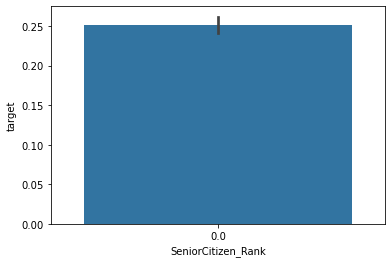

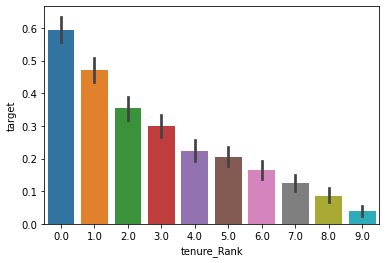

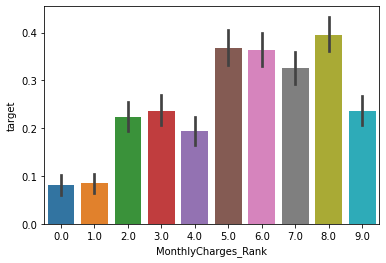

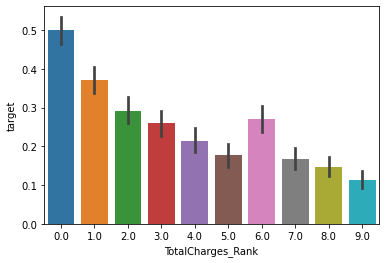

In [647]:
X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_bin_combined, estimator=mean )
plt.show()

In [648]:
select_features_df_num=num_1

In [649]:
num_1.shape

(6900, 4)

In [650]:
select_features_df_num.shape

(6900, 4)

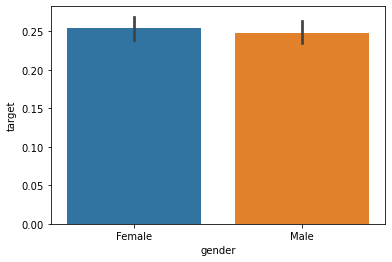

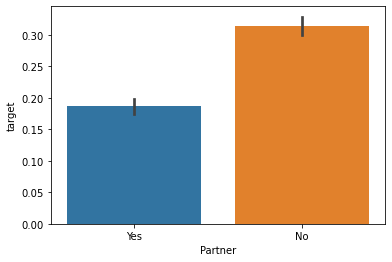

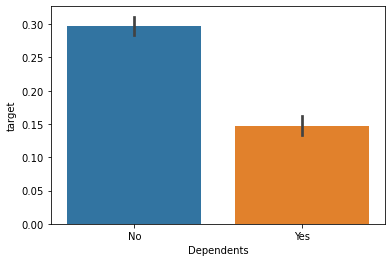

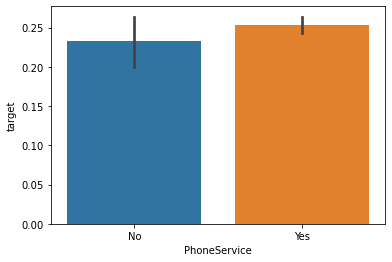

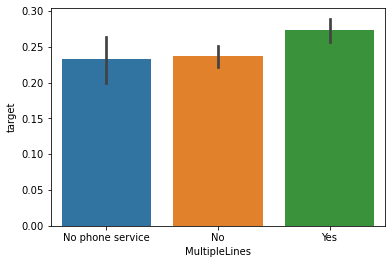

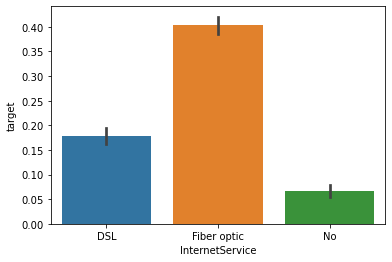

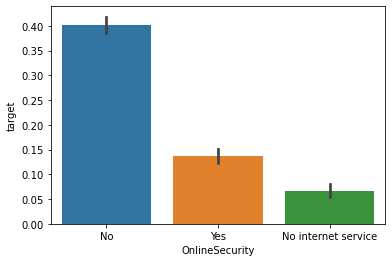

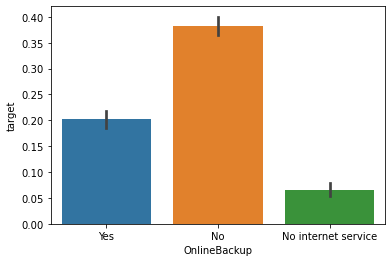

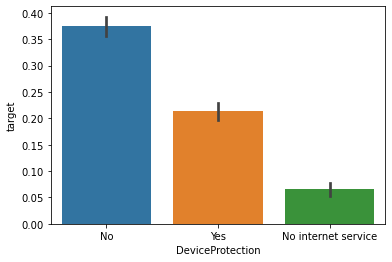

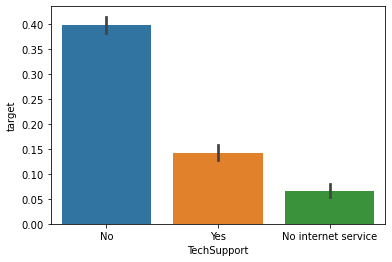

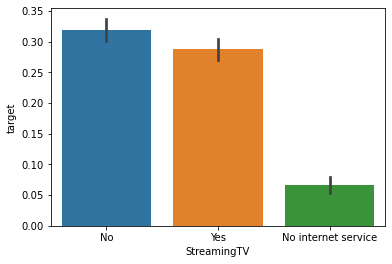

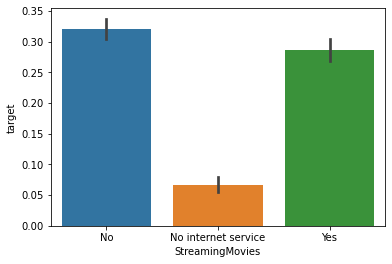

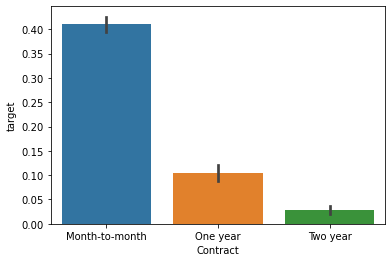

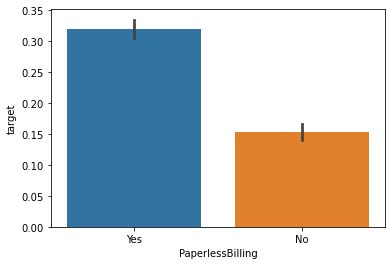

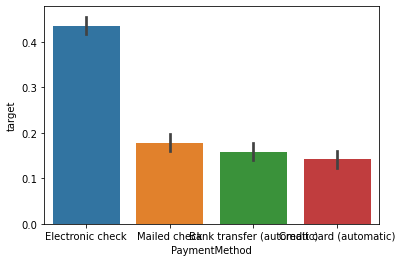

In [651]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_char_merged, estimator=mean )
plt.show()

In [652]:
char=char.drop(['gender','PhoneService','MultipleLines'],axis=1)

In [653]:
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(6900, 22)

In [654]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=20)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [655]:
select_features_df_char

,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0
6,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
1132,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
834,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1747,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [656]:
X_all=pd.concat([select_features_df_char,select_features_df_num],axis=1,join="inner")

In [657]:
X_all.shape

(6900, 24)

In [658]:
Y.shape

(6900, 1)

In [659]:
Y['target'].value_counts()

0    5164
1    1736
Name: target, dtype: int64

In [660]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=10)

In [661]:
y_test['target'].value_counts()

0    1544
1     526
Name: target, dtype: int64

In [662]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [663]:
y_pred_logreg=logreg.predict(X_test)

In [664]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [665]:
from sklearn import metrics

print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))

Precision 0.6495098039215687
Recall 0.5038022813688213
f1_score 0.5674518201284796


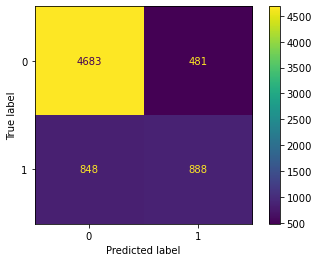

In [666]:
metrics.plot_confusion_matrix(logreg,X_all,Y)

In [667]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [668]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 3, 'min_samples_split': 50}


In [669]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=3,min_samples_split=50)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=50, random_state=0)

In [670]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=3,min_samples_split=50)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_split=50, random_state=0)

In [671]:
import pandas as pd
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
tenure,0.193266
PaymentMethod_Electronic check,0.136347
InternetService_Fiber optic,0.116057
TotalCharges,0.102567
Contract_Two year,0.098055
MonthlyCharges,0.057580
OnlineSecurity_Yes,0.039889
InternetService_No,0.037913
Contract_One year,0.035549
TechSupport_Yes,0.032678


In [672]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=3,min_samples_split=50)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', min_samples_split=50,
                           random_state=0)

In [673]:
import pandas as pd
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
tenure,0.277191
InternetService_Fiber optic,0.202923
PaymentMethod_Electronic check,0.118842
TotalCharges,0.092653
MonthlyCharges,0.088513
Contract_Two year,0.069446
Contract_One year,0.060553
TechSupport_Yes,0.017709
OnlineSecurity_Yes,0.017666
PaperlessBilling_Yes,0.015346


In [674]:
base_learners = [
                        ('rf', RandomForestClassifier(criterion='gini',random_state=0,max_depth=3,min_samples_split=50)),
                        ('gbm', GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=3,min_samples_split=50))  
                       ] 

In [675]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

In [676]:
clf.fit(X_train, y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=3,
                                                       min_samples_split=50,
                                                       random_state=0)),
                               ('gbm',
                                GradientBoostingClassifier(criterion='mse',
                                                           min_samples_split=50,
                                                           random_state=0))],
                   final_estimator=LogisticRegression())

In [677]:
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)
y_pred_stacking=clf.predict(X_test)

In [678]:
from sklearn import metrics

print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Precision 0.6286549707602339
Recall 0.40874524714828897
f1_score 0.49539170506912444


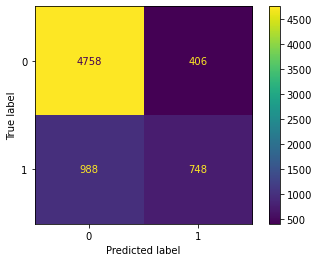

In [679]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [680]:
from sklearn import metrics

print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Precision 0.7033492822966507
Recall 0.279467680608365
f1_score 0.39999999999999997


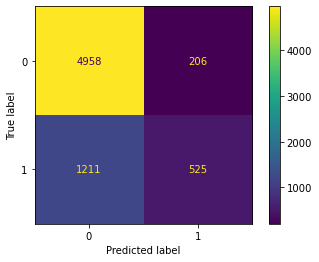

In [681]:
metrics.plot_confusion_matrix(rf,X_all,Y)

In [682]:
from sklearn import metrics

print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Precision 0.6412776412776413
Recall 0.49619771863117873
f1_score 0.5594855305466238


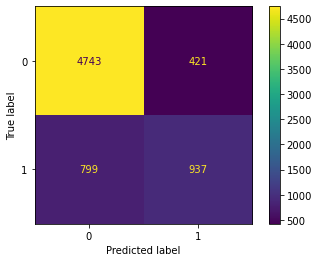

In [683]:
metrics.plot_confusion_matrix(gbm,X_all,Y)

In [684]:
from sklearn import metrics

print("Precision",metrics.precision_score(y_test,y_pred_stacking))
print("Recall",metrics.recall_score(y_test,y_pred_stacking))
print("f1_score",metrics.f1_score(y_test,y_pred_stacking))

Precision 0.6631299734748011
Recall 0.4752851711026616
f1_score 0.5537098560354374


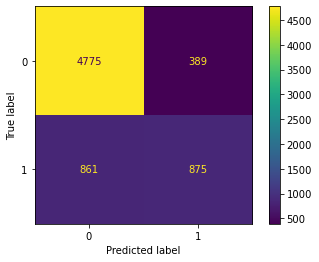

In [685]:
metrics.plot_confusion_matrix(clf,X_all,Y)

In [686]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1]
df_upsampled['pred_prob_GBM']=pd.DataFrame(y_pred_prob)
df_upsampled['P_Rank_GBM']=pd.qcut(df_upsampled['pred_prob_GBM'].rank(method='first').values,10,duplicates='drop').codes+1

In [687]:
df_upsampled['Predicted_Churn_Rank']=np.where(df_upsampled['P_Rank_GBM']>=8,"Top 3","Bottom 7")

In [688]:
df_upsampled_top3=df_upsampled.loc[df_upsampled['Predicted_Churn_Rank']=='Top 3',:]

In [689]:
service_list=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'
              ,'StreamingTV','StreamingMovies','Contract','PaperlessBilling']
target=['target']

total=service_list+target

In [690]:
df_upsampled_top3_services=df_upsampled_top3[service_list]

In [693]:
df_upsampled_top3_services

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling
0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes
9,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No
23,Yes,Yes,DSL,No,Yes,No,Yes,No,No,Two year,Yes
31,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes
32,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,One year,No
...,...,...,...,...,...,...,...,...,...,...,...
3796,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes
5070,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,One year,Yes
5698,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No
377,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes


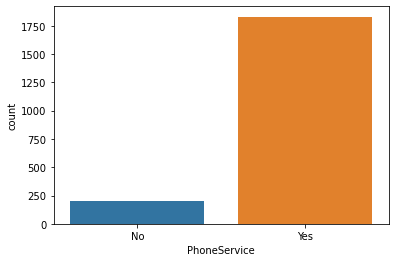

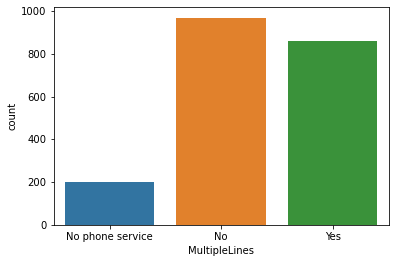

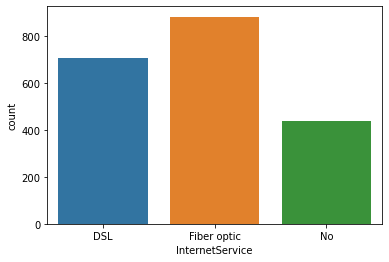

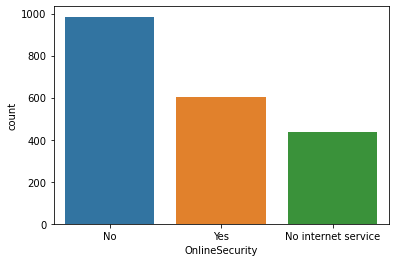

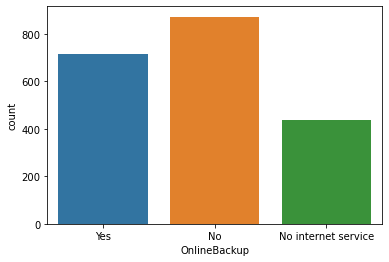

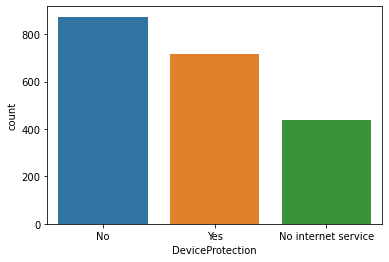

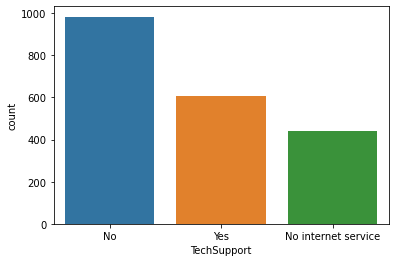

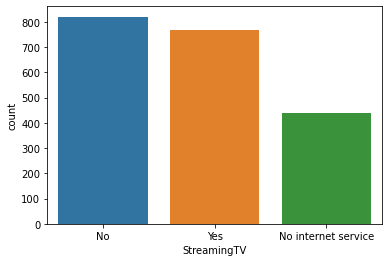

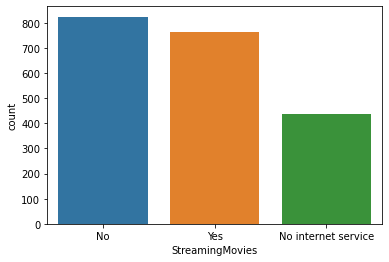

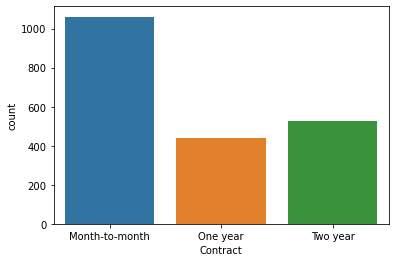

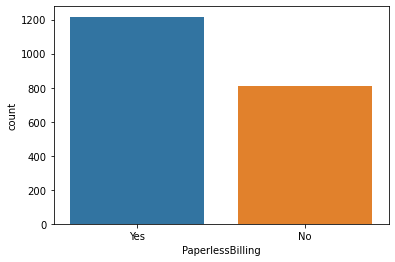

In [692]:
for col in (df_upsampled_top3_services.columns):
    plt.figure()
    sns.countplot(x=col,data=df_upsampled_top3_services)
plt.show()